# Import Package

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv('bigmartclean.csv')

# Data Prep

In [159]:
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non
2,2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,3,FDX07,19.20,Regular,0.058778,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,4,NCD19,8.93,Non-Edible,0.049017,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Others


In [160]:
df.columns

Index(['Unnamed: 0', 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_New'],
      dtype='object')

In [161]:
df.drop(columns=['Unnamed: 0','Item_Identifier'])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non
2,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,19.200,Regular,0.058778,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,8.930,Non-Edible,0.049017,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Others
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,non
8519,8.380,Regular,0.046982,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,non
8520,10.600,Non-Edible,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Others
8521,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,non


# Feature Selection

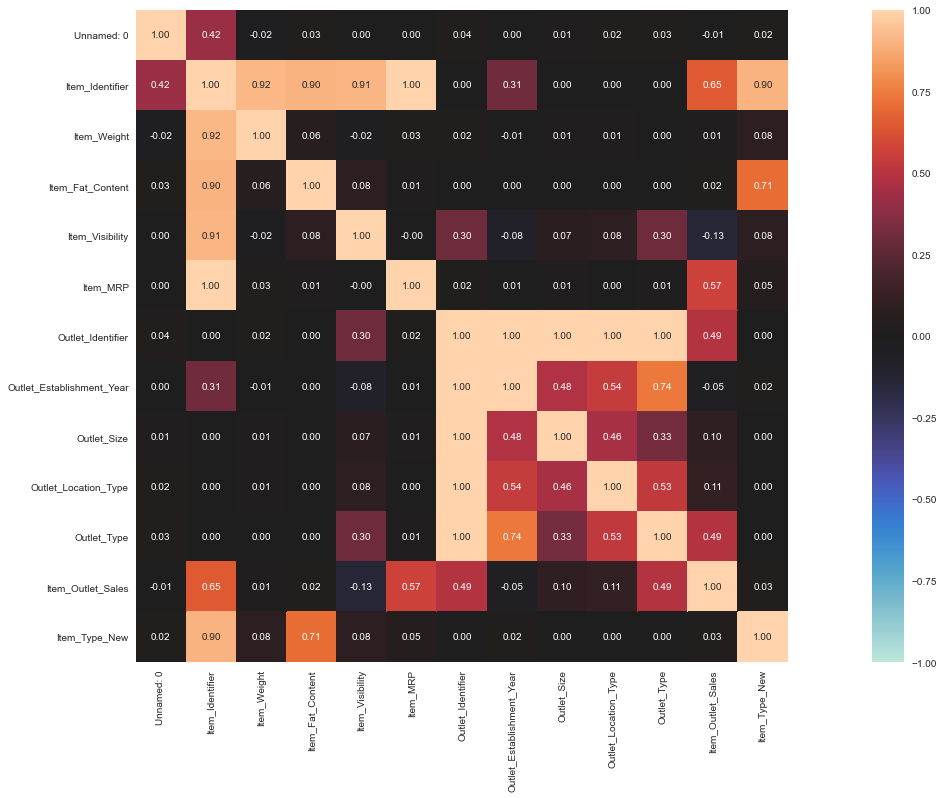

In [162]:
from dython.nominal import associations
associations(df,figsize=(30,12))
plt.show() #coba pilih salah satu yg kuning


# Encoding

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])


In [164]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [165]:
df

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Outlet
0,0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,0,1,3735.1380,2,9
1,1,DRC01,5.920,2,0.019278,48.2692,OUT018,2009,1,2,2,443.4228,1,3
2,2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,0,1,2097.2700,2,9
3,3,FDX07,19.200,2,0.058778,182.0950,OUT010,1998,1,2,0,732.3800,2,0
4,4,NCD19,8.930,1,0.049017,53.8614,OUT013,1987,0,2,1,994.7052,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,0,2,1,2778.3834,1,1
8519,8519,FDS36,8.380,2,0.046982,108.1570,OUT045,2002,1,1,1,549.2850,1,7
8520,8520,NCJ29,10.600,1,0.035186,85.1224,OUT035,2004,2,1,1,1193.1136,0,6
8521,8521,FDN46,7.210,2,0.145221,103.1332,OUT018,2009,1,2,2,1845.5976,1,3


In [166]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_New','Outlet'])

In [167]:
df.drop(columns=['Unnamed: 0','Outlet_Identifier'],inplace=True)

In [168]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.058778,182.0950,1998,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.049017,53.8614,1987,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Splitting Data and ML

In [169]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [170]:
X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
y = df['Item_Outlet_Sales']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Base KNN

In [172]:
KNN = KNeighborsRegressor()

In [173]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [174]:
pred_train_KNN = KNN.predict(X_train)

In [175]:
r2_train_KNN = r2_score(y_train,pred_train_KNN)
r2_train_KNN

0.649809928117936

In [176]:
pred_test_KNN = KNN.predict(X_test)

In [177]:
r2_test_KNN = r2_score(y_test,pred_test_KNN)
r2_test_KNN

0.49233937942813344

In [178]:
KNN.score(X_test,y_test)

0.49233937942813344

In [179]:
KNN.score(X_train,y_train)

0.649809928117936

# Base Random Forest

In [180]:
RF = RandomForestRegressor()

In [181]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [182]:
pred_RF_train = RF.predict(X_train)

In [183]:
r2_train_RF = r2_score(y_train,pred_RF_train)
r2_train_RF

0.937752375485883

In [184]:
pred_RF_test = RF.predict(X_test)

In [185]:
MAE_rf = mean_absolute_error(y_test,pred_RF_test)
MAE_rf

745.627092628739

In [186]:
MSE_rf = mean_squared_error(y_test,pred_RF_test)
MSE_rf

1141120.2928837629

In [187]:
RMSE_rf = np.sqrt(MSE_rf)
RMSE_rf

1068.232321587286

In [188]:
r2_test_RF = r2_score(y_test,pred_RF_test)
r2_test_RF

0.5801571522440614

# Base XGB

In [189]:
from xgboost import XGBRegressor

In [190]:
XGB = XGBRegressor()

In [191]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
pred_XGB_train = XGB.predict(X_train)

In [193]:
r2_train_XGB = r2_score(y_train,pred_XGB_train)
r2_train_XGB

0.8507234047664314

In [194]:
pred_XGB_test = XGB.predict(X_test)

In [195]:
MAE_xgb = mean_absolute_error(y_test,pred_XGB_test)
MAE_xgb

770.8824511942281

In [196]:
MSE_xgb = mean_squared_error(y_test,pred_XGB_test)
MSE_xgb

1228472.3945644947

In [197]:
RMSE_xgb = np.sqrt(MSE_xgb)
RMSE_xgb

1108.3647389575756

In [198]:
r2_test_XGB = r2_score(y_test,pred_XGB_test)
r2_test_XGB

0.5480184238770246

# Hyper Tuning XGB

In [199]:
XGB_model = XGBRegressor() #parameter diperbanyak

In [200]:
param_XGB = {'max_depth': [2,3,5],
            'n_estimators' : [80,100,75],
             'gamma': [0,0.7,7,9,11,13,17],
             'learning_rate':[0.1,1,0.07],
             
            }

In [201]:
XGB_Tuned = GridSearchCV(estimator=XGB_model, param_grid=param_XGB, cv = 10, n_jobs=-1, verbose=1)

In [202]:
XGB_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 189 candidates, totalling 1890 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1890 out of 1890 | elapsed:  6.2min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [203]:
XGB_Tuned.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [204]:
pred_XGB_Tuned = XGB_Tuned.predict(X_test)

In [205]:
pred_XGB_Train = XGB_Tuned.predict(X_train)

In [206]:
r2_XGB_Tuned = r2_score(y_test,pred_XGB_Tuned)
r2_XGB_Tuned

0.6129782564924416

In [207]:
XGB_Tuned.score(X_train,y_train)

0.6183394431323196

In [208]:
XGB_Tuned.score(X_test,y_test)

0.6129782564924416

In [209]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': pred_XGB_Tuned})
RFdata.head(10)

,Actual,Prediction
7503,1743.0644,1282.622681
2957,356.8688,717.469849
7031,377.5086,725.719116
1084,5778.4782,4706.030273
856,2356.9320,3244.143555
4304,865.5400,673.168701
2132,4613.9940,5516.068359
1385,2410.8618,1893.937988
5239,1948.1308,1485.003296
6516,1937.4780,2839.145020


In [210]:
MAE_XGB = mean_absolute_error(y_test,pred_XGB_Tuned)
MAE_XGB

717.7549757717458

In [211]:
MAE_XGB_Train = mean_absolute_error(y_train,pred_XGB_Train)
MAE_XGB_Train

747.3645718029883

In [212]:
MSE = mean_squared_error(y_test,pred_XGB_Tuned)
MSE

1051913.5139833584

In [213]:
rmse = np.sqrt(MSE)
rmse

1025.6283508090826

In [214]:
R2_XGB_Tuned = r2_score(y_test,pred_XGB_Tuned)
R2_XGB_Tuned

0.6129782564924416

In [215]:
# import joblib
# joblib.dump(XGB_Tuned,'ModelXGB')

# Hyper Tuning RF

In [216]:
RF_Tuned = RandomForestRegressor()

In [217]:
param_RF = {
            'n_estimators' : [100,200,300,500],
            'max_depth':[1,3,7,None],
            'min_samples_split' :[20,5,2],
            'min_impurity_decrease':[0.0,0.5,0.7]
}


In [218]:
RF_Tuned = GridSearchCV(estimator=RF_Tuned, param_grid=param_RF, cv = 10, n_jobs=-1, verbose=1,scoring=)

In [219]:
RF_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 35.0min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 7, None],
                         'min_impurity_decrease': [0.0, 0.5, 0.7],
                         'min_samples_split': [20, 5, 2],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=1)

In [220]:
RF_Tuned.score(X_test,y_test)

0.6129955998181776

In [221]:
RF_Tuned.score(X_train,y_train)

0.6366098097217668

In [222]:
RF_Tuned.predict([[1.30,0.12,200,1998,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0]])

array([3179.37336293])

In [223]:
pred_RF_Tuned = RF_Tuned.predict(X_test)

In [224]:
MAE_RF= mean_absolute_error(y_test,pred_RF_Tuned)
MAE_RF

715.8279965836095

In [225]:
MSE_RF = mean_squared_error(y_test,pred_RF_Tuned)
MSE_RF

1051866.3753431523

In [226]:
RMSE_RF = np.sqrt(MSE_RF)
RMSE_RF

1025.6053701805351

In [227]:
R2_RF = r2_score(y_test,pred_RF_Tuned)
R2_RF

0.6129955998181776

In [228]:
print('Hasil Evaluation Matrix: ')
print('MAE :', MAE_RF)
print('MSE :', MSE_RF)
print('RMSE :', RMSE_RF)
print('R2 :', R2_RF)

Hasil Evaluation Matrix: 
MAE : 715.8279965836095
MSE : 1051866.3753431523
RMSE : 1025.6053701805351
R2 : 0.6129955998181776


In [229]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': pred_RF_Tuned})
RFdata.head(10)

,Actual,Prediction
7503,1743.0644,1200.128029
2957,356.8688,687.660872
7031,377.5086,680.868016
1084,5778.4782,5023.571043
856,2356.9320,3148.264065
4304,865.5400,550.234603
2132,4613.9940,5643.772085
1385,2410.8618,1936.756128
5239,1948.1308,1472.122866
6516,1937.4780,2981.533556


In [230]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': pred_RF_Tuned})
RFdata.sample(10).mean()

Actual        1887.210100
Prediction    2216.669251
dtype: float64

In [231]:
# # karna paling bagus maka kita import

# import joblib
# joblib.dump(RF_Tuned,'ModelRF')

# Scaling & Hyper Tuning KNN

In [232]:
from sklearn.preprocessing import RobustScaler

In [233]:
scaling = RobustScaler()

In [234]:
X_scaled = scaling.fit_transform(X)

In [235]:
X= X_scaled
y=df['Item_Outlet_Sales']

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [237]:
model_scaled = KNeighborsRegressor()

In [238]:
model_scaled.fit(X_train,y_train)

KNeighborsRegressor()

In [239]:
pred_scaled = model_scaled.predict(X_test)

In [240]:
MAE_scaled = mean_absolute_error(y_test,pred_scaled)
MSE_scaled = mean_squared_error(y_test,pred_scaled)
RMSE_scaled = np.sqrt(MSE_scaled)
R2_scaled = r2_score(y_test,pred_scaled)

In [241]:
print('Hasil Evaluation Matrix: ')
print('MAE :', MAE_scaled)
print('MSE :', MSE_scaled)
print('RMSE :', RMSE_scaled)
print('R2 :', R2_scaled)

Hasil Evaluation Matrix: 
MAE : 782.6102949912023
MSE : 1247228.8828471315
RMSE : 1116.7940198833137
R2 : 0.5411175059776657


In [242]:
KNN_Tuned = KNeighborsRegressor()

In [243]:
param_knn ={
            'n_neighbors':[5,151,201,171,251],
            'leaf_size': [15,30,50,100,150]
}

In [244]:
KNN_Tuning = GridSearchCV(estimator=KNN_Tuned, param_grid=param_knn, cv = 10, n_jobs=-1, verbose=1)

In [245]:
KNN_Tuning.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   34.4s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [15, 30, 50, 100, 150],
                         'n_neighbors': [5, 151, 201, 171, 251]},
             verbose=1)

In [246]:
KNN_Tuning.score(X_test,y_test)

0.5411175059776657

In [247]:
KNN_Tuning.score(X_train,y_train)

0.670853266449092

In [248]:
datas = {
    'Scaled KNN': [MAE_scaled,MSE_scaled,RMSE_scaled,R2_scaled],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,r2_test_RF],
    'Base XGB': [MAE_xgb,MSE_xgb,RMSE_xgb,r2_test_XGB],
    'RF TUNED': [MAE_RF,MSE_RF,RMSE_RF,R2_RF],
    'XGB TUNED': [MAE_XGB,MSE,rmse,R2_XGB_Tuned]

}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2
RF TUNED,715.827997,1.051866e+06,1025.605370,0.612996
XGB TUNED,717.754976,1.051914e+06,1025.628351,0.612978
Base RF,745.627093,1.141120e+06,1068.232322,0.580157
Base XGB,770.882451,1.228472e+06,1108.364739,0.548018
Scaled KNN,782.610295,1.247229e+06,1116.794020,0.541118


# Kesimpulan

Dari sini saya melakukan ML menggunakan 3 algo, dan melakukan tuning terhadap 2 model terbaik, yaitu RF dan XGB. setelah di Tuning, ternyata RF Tuned, mendapatkan posisi 1 dimana R2 paling tinggi dan erornya lebih rendah. 

In [258]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.058778,182.0950,1998,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.049017,53.8614,1987,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [259]:
df.iloc[4]

Item_Identifier                  NCD19
Item_Weight                       8.93
Item_Visibility              0.0490165
Item_MRP                       53.8614
Outlet_Establishment_Year         1987
Item_Outlet_Sales              994.705
Item_Fat_Content_0                   0
Item_Fat_Content_1                   1
Item_Fat_Content_2                   0
Outlet_Location_Type_0               0
Outlet_Location_Type_1               0
Outlet_Location_Type_2               1
Outlet_Size_0                        1
Outlet_Size_1                        0
Outlet_Size_2                        0
Outlet_Type_0                        0
Outlet_Type_1                        1
Outlet_Type_2                        0
Outlet_Type_3                        0
Item_Type_New_0                      1
Item_Type_New_1                      0
Item_Type_New_2                      0
Outlet_0                             0
Outlet_1                             1
Outlet_2                             0
Outlet_3                 